Reading classics [Python Machine Learning 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part3.ipynb)

In [1]:
%%writefile color_header.py
from IPython.display import display,HTML
from IPython.core.magic import register_line_magic
import random,warnings; warnings.filterwarnings('ignore')

@register_line_magic
def header(string):
    font_size=24; font_family='Ewert'
    width=650; height=font_size*2.5
    randi=str(random.uniform(0,9999999))
    html_str="""
    <head><script src='https://d3js.org/d3.v6.min.js'></script>
    </head><style>@import 'https://fonts.googleapis.com/css?family="""+\
    font_family+"""&effect=3d'; #colorized1 {font-family:"""+font_family+\
    """; color:white; text-align:center; font-size:"""+str(font_size)+\
    """px;}</style><h1 id='colorized1' class='font-effect-3d'>"""+string+\
    """</h1><script>
    var tc=setInterval(function(){
        var now=new Date().getTime();
        var iddoc1=document.getElementById('colorized1');
        iddoc1.style.color=d3.interpolateSinebow(now/60000); },1)
    </script>"""
    file='d3header'+randi+'.html'
    with open(file,'w') as f:
         f.write(html_str); f.close()
    string="""<div id='html_string"""+randi+\
    """'><iframe src='"""+file+\
    """' height="""+str(height)+""" width="""+str(width)+\
    """ style='display:block;'></iframe></div>"""
    display(HTML(string))

Writing color_header.py


In [2]:
%run color_header.py
%header Code Modules, Settings, & Functions

In [3]:
from IPython.display import display,HTML
from IPython.core.magic import register_line_magic
import random,warnings; warnings.filterwarnings('ignore')
import tensorflow as tf,pylab as pl,numpy as np
import tensorflow.keras.layers as tkl
import tensorflow_datasets as tfds
from tensorflow.data import Dataset as tds
tf.random.set_seed(123)
np.random.seed(123)
tfds.disable_progress_bar()

def styled_header(str):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family=Aladin&effect=3d-float';      
    </style><h1 class='font-effect-3d-float' 
    style='font-family:Aladin; color:#ff6611; font-size:20px;'>%s</h1>"""%str))
    
@register_line_magic
def display_data(data):
    global features
    if data=='train': x,y=x_train,y_train
    if data=='test': x,y=x_test,y_test
    if data=='vaid': x,y=x_valid,y_valid
    cols=[['#ff6611','#11ffee'][int(el)] for el in y]
    pl.figure(figsize=(10,6))
    pl.scatter(x[:,0],x[:,1],c=cols,marker='*')
    styled_header('Labeled Artificial Data')
    pl.tight_layout(); pl.grid(); pl.show()
    styled_header(str(features))
    
@register_line_magic
def display_predictions(data):
    global y_valid,py_valid,y_test,py_test
    if data=='test': py,y=py_test,y_test
    if data=='valid': py,y=py_valid,y_valid
    pl.figure(figsize=(10,3))
    pl.scatter(range(len(y)),y,s=50,
               label='real data',c="#11ffee")
    pl.scatter(range(len(py)),py,s=20,marker='*',
               label='predictions',c="#ff6611")
    pl.grid(); pl.legend(); pl.tight_layout(); pl.show()
    
@register_line_magic
def make_XOR(N):
    N=int(N)
    global x_train,x_valid,x_test,\
           y_train,y_valid,y_test
    x=np.random.uniform(low=-1,high=1,size=(N,2))
    y=np.ones(len(x)); y[x[:,0]*x[:,1]<0]=0
    x_train,y_train=x[:int(.8*N),:],y[:int(.8*N)]
    x_valid=x[int(.8*N):int(.9*N),:]
    y_valid=y[int(.8*N):int(.9*N)]
    x_test,y_test=x[int(.9*N):,:],y[int(.9*N):]
    
def train_input_fn(x_train,y_train,batch_size):
    ds=tds.from_tensor_slices(
        ({'input-features':x_train},y_train.reshape(-1,1)))
    return ds.shuffle(1000).repeat().batch(batch_size)

def valid_input_fn(x_vaid,y_valid,batch_size):
    ds=tds.from_tensor_slices(
        ({'input-features':x_valid},y_valid.reshape(-1,1)))
    return ds.batch(batch_size)

def test_input_fn(x_test,y_test,batch_size):
    if y_test is None:
        ds=tds.from_tensor_slices({'input-features':x_test})
    else:
        ds=tds.from_tensor_slices(
            ({'input-features':x_test},y_test.reshape(-1,1)))
    return ds.batch(batch_size)

@register_line_magic
def train_valid(pars):
    pars=pars.split()
    num_epochs=int(pars[0])
    batch_size=int(pars[1])
    global tfe,x_train,y_train,x_valid,y_valid
    steps_per_epoch=np.ceil(len(x_train)/batch_size)
    train_spec=tf.estimator\
    .TrainSpec(input_fn=lambda:\
               train_input_fn(x_train,y_train,batch_size),
               max_steps=num_epochs*steps_per_epoch)
    valid_spec=tf.estimator\
    .EvalSpec(input_fn=lambda:\
              valid_input_fn(x_valid,y_valid,batch_size))
    tf.estimator.train_and_evaluate(tfe,train_spec,valid_spec)
    
def test(batch_size):
    global tfe,x_test,y_test
    test_result=tfe\
    .evaluate(input_fn=lambda:\
              test_input_fn(x_test,y_test,batch_size))
    y_test_pred=tfe\
    .predict(input_fn=lambda:\
             test_input_fn(x_test,y_test,batch_size))
    py_test=[]
    for i in range(len(y_test)):
        py_test.append(round(next(iter(y_test_pred))['out'][0]))
    return test_result,py_test

In [4]:
%header Artificial Data

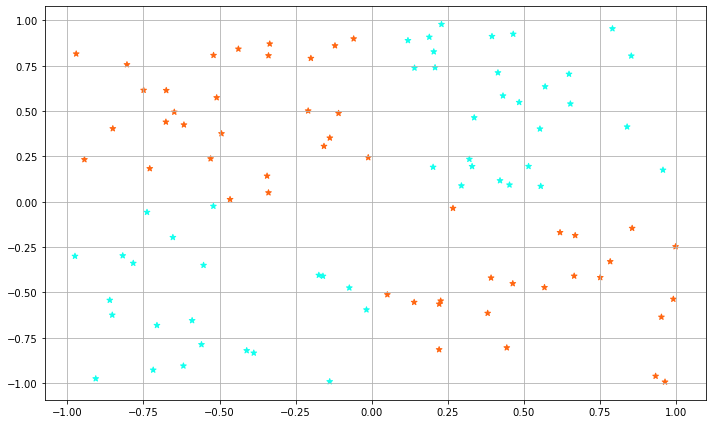

In [5]:
[x_train,x_valid,x_test,y_train,y_valid,y_test]=\
[[] for i in range(6)]
%make_XOR 1000
features=[tf.feature_column.numeric_column(
          key='input-features:',shape=(2,))]
%display_data test

In [6]:
%header Built Keras Models as Estimators

In [7]:
model=tf.keras.Sequential([
    tkl.Input(shape=(2,),name='input-features'),
    tkl.Dense(units=4,activation='relu'),
    tkl.Dense(units=8,activation='relu'),
    tkl.Dense(units=4,activation='relu'),
    tkl.Dense(1,activation='sigmoid',name='out')])
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
tfe=tf.keras.estimator.model_to_estimator(
    keras_model=model,
    model_dir='models/estimator-for-XOR/')

In [8]:
%header Training

In [9]:
print(model.summary())
styled_header(tfe.config.session_config)
%train_valid 200 8

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
out (Dense)                  (None, 1)                 5         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
%header Evaluation

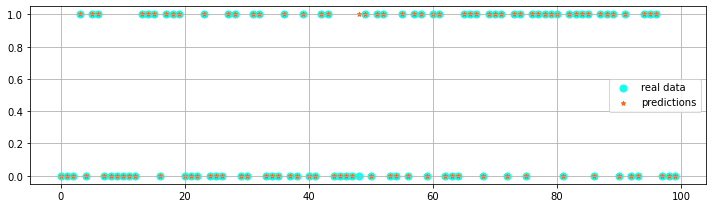

In [11]:
test_result,py_test=test(8)
styled_header(test_result)
%display_predictions test